# **Исследование данных сервиса “Яндекс.Музыка” — сравнение пользователей двух городов**

<h1>Содержание:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Стиль-заголовков" data-toc-modified-id="Стиль-заголовков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Стиль заголовков</a></span></li><li><span><a href="#Пропуски-значений" data-toc-modified-id="Пропуски-значений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Пропуски значений</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Дубликаты</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Сравнение-поведения-пользователей-двух-столиц" data-toc-modified-id="Сравнение-поведения-пользователей-двух-столиц-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сравнение поведения пользователей двух столиц</a></span></li><li><span><a href="#Музыка-в-начале-и-в-конце-недели" data-toc-modified-id="Музыка-в-начале-и-в-конце-недели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Музыка в начале и в конце недели</a></span></li><li><span><a href="#Жанровые-предпочтения-в-Москве-и-Петербурге" data-toc-modified-id="Жанровые-предпочтения-в-Москве-и-Петербурге-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Жанровые предпочтения в Москве и Петербурге</a></span></li></ul></li><li><span><a href="#Итоги-исследования" data-toc-modified-id="Итоги-исследования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоги исследования</a></span></li></ul></div>

**Задача проекта**

На реальных данных Яндекс.Музыки c помощью библиотеки Pandas и её возможностей проверить данные и сравнить поведение и предпочтения пользователей двух столиц — Москвы и Санкт-Петербурга.

**Проверка гипотез**
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.



## Обзор данных

Импортируем библиотеки. Прочитаем файл yandex_music_project.csv, сохраним его в переменной df.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/yandex_music_project.csv')
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


Изучим общую информацию о таблице:

In [3]:
def info (df):            # функция для получения первичной информации о датасете
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.float_format', '{:,.2f}'.format)
    print(f'В таблице строк: {df.shape[0]}, столбцов: {df.shape[1]} ')
    print('Количество дубликатов:', df.duplicated().sum())
    print('Процент дубликатов: ', "{:.2%}".format((df.duplicated().sum()/df.shape[0])))
    tbl = pd.concat([df.dtypes, df.isna().sum(), round((df.isna().mean()*100),2), ], axis=1, 
                   keys=["Тип данных", "Кол-во пропусков", "% пропусков", ])
    display(tbl)

info(df)


В таблице строк: 65079, столбцов: 7 
Количество дубликатов: 3826
Процент дубликатов:  5.88%


,Тип данных,Кол-во пропусков,% пропусков
userID,object,0,0.00
Track,object,1231,1.89
artist,object,7203,11.07
genre,object,1198,1.84
City,object,0,0.00
time,object,0,0.00
Day,object,0,0.00


Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

В названиях колонок видны нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Встречаются пробелы.
3. Название из нескольких слов не разделено "_".



**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем. Также обнаружено 3826 дубликатов, что составляет около 6%.

Для дальнейшего анализа устраним проблемы в данных.

## Предобработка данных
Исправим стиль в заголовках столбцов, исключим пропуски и дубликаты. 

### Стиль заголовков


In [4]:
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

Приведем названия колонок в соответствие с хорошим стилем.
Для этого переименуем их так:

In [5]:
df = df.rename(columns = {
    '  userID': 'user_id',
    'Track': 'track',
    '  City  ': 'city',
    'Day': 'day'
})

Проверим результат.

In [6]:
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

### Пропуски значений
Выведем количество пропусков

In [7]:
tbl = pd.concat([df.isna().sum(), round((df.isna().mean()*100),2), ], axis=1, 
                   keys=["Кол-во пропусков", "% пропусков", ])
display(tbl)

,Кол-во пропусков,% пропусков
user_id,0,0.00
track,1231,1.89
artist,7203,11.07
genre,1198,1.84
city,0,0.00
time,0,0.00
day,0,0.00


Не все пропущенные значения влияют на исследование. Пропуски в `track` и `artist` достаточно заменить их явными обозначениями.

Пропуски в `genre` могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге. Было бы правильно установить причину пропусков и восстановить данные. Поскольку такой возможности у нас нет, а процент пропусков всего 1.84% от общего массива данных, также заполним эти пропуски явными обозначениями. 

Заменим пропущенные значения в столбцах `track`, `artist` и `genre` на строку `'unknown'`.

In [8]:
columns_to_replace = ['track', 'artist', 'genre']
for col in columns_to_replace:
    df[col] = df[col].fillna('unknown')

Убедимся, что в таблице не осталось пропусков.

In [9]:
df.isna().sum()

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

### Обработка дубликатов

In [10]:
df.duplicated().sum()

3826

Удалим явные дубликаты:

In [11]:
df = df.drop_duplicates().reset_index(drop=True)
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


Проверим данные на наличие неявных дубликатов. Например, в колонке `genre` название одного и того же жанра может быть записано по-разному. Такие ошибки тоже повлияют на результат исследования.

Выведем список уникальных названий жанров, отсортированный по алфавиту.

In [12]:
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

Можно выделить следующие неявные дубликаты: *hip*, *hop*, *hip-hop*, *электроника*, *electronic*.

Чтобы очистить от них таблицу, напишем функцию с двумя параметрами: 
* `wrong_genres` — список дубликатов,
* `correct_genre` — строка с правильным значением.

In [13]:
def replace_wrong_genres(wrong_genres, correct_genre):
    for genre in wrong_genres:
        df['genre'] = df['genre'].replace(genre, correct_genre)

Вызовем функцию и заменим значения в колонке жанров

In [14]:
replace_wrong_genres(['hip', 'hop', 'hip-hop'], 'hiphop')
replace_wrong_genres(['электроника'], 'electronic')

Проверим, что названия изменились:

In [15]:
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Мы исправили заголовки, пропущенные значения заменили на `'unknown'`, избавились от дубликатов.

 Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке `genre`.

Теперь можно перейти к проверке гипотез. 

## Проверка гипотез

### Сравнение поведения пользователей двух столиц

Проверим гипотезу о том, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Для проверки используем данные о трёх днях недели — понедельнике, среде и пятнице. Для этого:

* Разделим пользователей Москвы и Санкт-Петербурга
* Сравним, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.


Оценим активность пользователей в каждом городе. Сгруппируем данные по городу и посчитаем количество прослушиваний.



In [16]:
df_part = df.groupby('city')['track'].count()
df_part

city
Moscow              42741
Saint-Petersburg    18512
Name: track, dtype: int64

В Москве прослушиваний больше, чем в Петербурге. Это не значит, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

Сгруппируем данные по дню недели и подсчитаем прослушивания в понедельник, среду и пятницу.

In [17]:
df_part = df.groupby('day')['track'].count()
df_part

day
Friday       21840
Monday       21354
Wednesday    18059
Name: track, dtype: int64

В среднем пользователи из двух городов менее активны по средам. Но картина может измениться, если рассмотреть каждый город в отдельности.

Создадим функцию `number_tracks()`, которая посчитает прослушивания для заданного дня и города. Зададим два параметра:
* день недели,
* название города.


In [18]:
def number_tracks(day, city):
    track_list = df[df['day'] == day]
    track_list = track_list[track_list['city'] == city]
    track_list_count = track_list['user_id'].count()
    return track_list_count

Используя `number_tracks()`, получим данные для каждого города в каждый из трёх дней.

In [19]:
for day in df['day'].unique():
  for city in df['city'].unique():
    print(f'{number_tracks(day, city)} tracks on {day} in {city} ' )

7003 tracks on Wednesday in Saint-Petersburg 
11056 tracks on Wednesday in Moscow 
5895 tracks on Friday in Saint-Petersburg 
15945 tracks on Friday in Moscow 
5614 tracks on Monday in Saint-Petersburg 
15740 tracks on Monday in Moscow 


Построим сводную таблицу, где:
* названия колонок — дни недели;
* данные — количество прослушиваний в городах.

In [20]:
df_pivot = df.pivot_table(index='day', columns='city', values='user_id', aggfunc='count')
new_index = ['Monday', 'Wednesday', 'Friday']
df_pivot = df_pivot.reindex(new_index)
df_pivot

city,Moscow,Saint-Petersburg
day,,
Monday,15740,5614
Wednesday,11056,7003
Friday,15945,5895


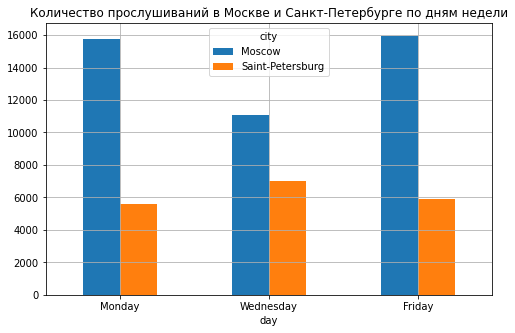

In [21]:
(df_pivot
 .plot(
     kind='bar', 
     grid=True, 
     figsize=(8, 5)
     )
 )
plt.title('Количество прослушиваний в Москве и Санкт-Петербурге по дням недели')
plt.xticks(rotation=0);

**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

Сохраним таблицы с данными в две переменные:
* по Москве — в `moscow_general`;
* по Санкт-Петербургу — в `spb_general`.

In [22]:
moscow_general = df[df['city'] == 'Moscow']

In [23]:
spb_general = df[df['city'] == 'Saint-Petersburg']

Создадим функцию `genre_weekday()` с четырьмя параметрами:
* таблица (датафрейм) с данными,
* день недели,
* начальная временная метка в формате 'hh:mm', 
* последняя временная метка в формате 'hh:mm'.

Функция возвращает информацию о топ-10 жанров тех треков, которые прослушивали в указанный день, в промежутке между двумя отметками времени.

In [24]:
def genre_weekday(table, day, time1, time2):
    genre_df = (
        table.query('@day==day and @time1 < time < @time2')
        .groupby('genre')['track']
        .count()
        .sort_values(ascending=False)
        )
    return genre_df.head(10)


Cравним результаты функции `genre_weekday()` для Москвы и Санкт-Петербурга в понедельник утром (с 7:00 до 11:00) и в пятницу вечером (с 17:00 до 23:00):

In [25]:
genre_weekday(moscow_general, 'Monday', '07:00', '11:00')

genre
pop            781
dance          549
electronic     480
rock           474
hiphop         286
ruspop         186
world          181
rusrap         175
alternative    164
unknown        161
Name: track, dtype: int64

In [26]:
genre_weekday(spb_general, 'Monday', '07:00', '11:00')

genre
pop            218
dance          182
rock           162
electronic     147
hiphop          80
ruspop          64
alternative     58
rusrap          55
jazz            44
classical       40
Name: track, dtype: int64

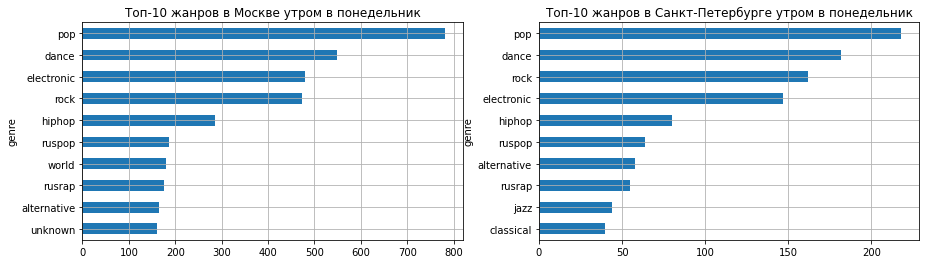

In [27]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
genre_weekday(moscow_general, 'Monday', '07:00', '11:00').sort_values().plot(kind="barh", grid=True)
plt.title('Топ-10 жанров в Москве утром в понедельник');
plt.subplot(1, 2, 2)
genre_weekday(spb_general, 'Monday', '07:00', '11:00').sort_values().plot(kind="barh", grid=True)
plt.title('Топ-10 жанров в Санкт-Петербурге утром в понедельник');

In [28]:
genre_weekday(moscow_general, 'Friday', '17:00', '23:00')

genre
pop            713
rock           517
dance          495
electronic     482
hiphop         273
world          208
ruspop         170
alternative    163
classical      163
rusrap         142
Name: track, dtype: int64

In [29]:
genre_weekday(spb_general, 'Friday', '17:00', '23:00')

genre
pop            256
electronic     216
rock           216
dance          210
hiphop          97
alternative     63
jazz            61
classical       60
rusrap          59
world           54
Name: track, dtype: int64

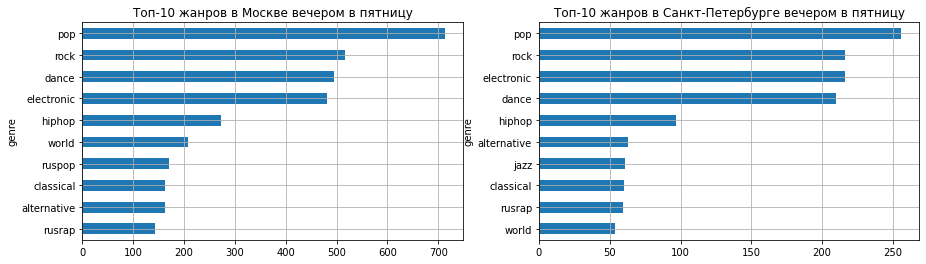

In [30]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
genre_weekday(moscow_general, 'Friday', '17:00', '23:00').sort_values().plot(kind="barh", grid=True)
plt.title('Топ-10 жанров в Москве вечером в пятницу');
plt.subplot(1, 2, 2)
genre_weekday(spb_general, 'Friday', '17:00', '23:00').sort_values().plot(kind="barh", grid=True)
plt.title('Топ-10 жанров в Санкт-Петербурге вечером в пятницу');

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

Сгруппируем таблицы `moscow_general` и `spb_general` по жанру и посчитаем прослушивания треков каждого жанра. Отсортируем результат в порядке убывания и сохраним его в отдельных таблицах.

In [31]:
moscow_genres = moscow_general.groupby('genre')['genre'].count().sort_values(ascending=False)
moscow_genres.head(10)

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: genre, dtype: int64

In [32]:
spb_genres = spb_general.groupby('genre')['genre'].count().sort_values(ascending=False)
spb_genres.head(10)

genre
pop            2431
dance          1932
rock           1879
electronic     1737
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          538
world           515
Name: genre, dtype: int64

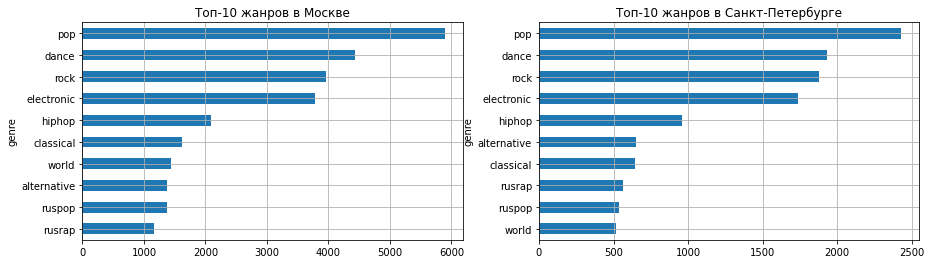

In [33]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
moscow_genres.head(10).sort_values().plot(kind="barh", grid=True)
plt.title('Топ-10 жанров в Москве');
plt.subplot(1, 2, 2)
spb_genres.head(10).sort_values().plot(kind="barh", grid=True)
plt.title('Топ-10 жанров в Санкт-Петербурге');

**Выводы**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 


## Итоги исследования

Мы проверили три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.
